In [1]:
ls

sample_data/


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [5]:
pwd

'/content/drive/MyDrive'

**EXTRACTING THE ZIP FILE**

In [9]:
 flowers.zip

NameError: ignored

**IMAGE AUGMENTATION**

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**SCALING**

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)

In [12]:
test_datagen = ImageDataGenerator(rescale=1./255)

**SPLITTING THE DATASET INTO TRAINING TESTING AND VALIDATION**

In [13]:
pip install split-folders[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
import splitfolders

In [15]:
input_folder = 'flowers/'

In [16]:
splitfolders.ratio(input_folder,output="flowers2",seed=42,ratio=(.7,.2,.1),group_prefix=None)

Copying files: 4317 files [01:23, 51.93 files/s] 


**LOADING THE TRAINING DATA**

In [18]:
x_train=train_datagen.flow_from_directory(r"/content/drive/MyDrive/flowers2/train",target_size=(64,64),class_mode="categorical",batch_size=24)

Found 3019 images belonging to 5 classes.


**LOADING THE TESTING DATA**

In [19]:
x_test=train_datagen.flow_from_directory(r"/content/drive/MyDrive/flowers2/val",target_size=(64,64),class_mode="categorical",batch_size=24)

Found 860 images belonging to 5 classes.


In [20]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

**CREATING CNN MODEL**

In [21]:
from tensorflow.keras.models import Sequential

In [22]:
from tensorflow.keras.layers import Dense,Convolution2D,MaxPool2D,Flatten

**INITIALIZING THE MODEL**

In [23]:
model=Sequential()

**ADDING LAYERS**

**CONVOLUTION LAYER**

In [24]:
model.add(Convolution2D(32,(3,3),activation="relu",strides=(1,1),input_shape=(64,64,3)))

**MAX POOLING LAYER**

In [25]:
model.add(MaxPool2D(pool_size=(2,2)))

**FLATTEN LAYER**

In [26]:
model.add(Flatten())

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


**FULLY CONNECTED LAYER**

In [28]:
model.add(Dense(300,activation="relu"))

In [29]:
model.add(Dense(300,activation="relu"))

**OUTPUT LAYER**

In [30]:
model.add(Dense(5,activation="softmax"))

**COMPILING THE MODEL**

In [31]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [32]:
model.fit(x_train,epochs=10,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test))

Epoch 1/10
126/126 [==============================] - 24s 183ms/step - loss: 1.2835 - accuracy: 0.4717 - val_loss: 1.1233 - val_accuracy: 0.5221
Epoch 2/10
126/126 [==============================] - 23s 184ms/step - loss: 1.0918 - accuracy: 0.5701 - val_loss: 1.1440 - val_accuracy: 0.5337
Epoch 3/10
126/126 [==============================] - 23s 182ms/step - loss: 1.0380 - accuracy: 0.5952 - val_loss: 1.0103 - val_accuracy: 0.5733
Epoch 4/10
126/126 [==============================] - 23s 181ms/step - loss: 0.9782 - accuracy: 0.6224 - val_loss: 1.0134 - val_accuracy: 0.5965
Epoch 5/10
126/126 [==============================] - 23s 181ms/step - loss: 0.9338 - accuracy: 0.6413 - val_loss: 0.9322 - val_accuracy: 0.6058
Epoch 6/10
126/126 [==============================] - 23s 179ms/step - loss: 0.8811 - accuracy: 0.6668 - val_loss: 0.9172 - val_accuracy: 0.6360
Epoch 7/10
126/126 [==============================] - 23s 180ms/step - loss: 0.8404 - accuracy: 0.6688 - val_loss: 0.8990 - val_ac

**SAVING THE MODEL**

In [33]:
model.save('flowers.h5')

**TESTING THE MODEL**

In [34]:
import numpy as np

In [35]:
from tensorflow.keras.models import load_model

In [36]:
from tensorflow.keras.preprocessing import image

**LOADING THE MODEL**

In [37]:
model=load_model('flowers.h5')

In [38]:
img=image.load_img(r"/content/drive/MyDrive/flowers2/test/rose/11233672494_d8bf0a3dbf_n.jpg")

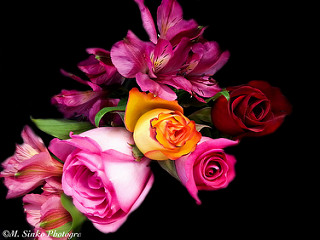

In [39]:
img

In [40]:
img=image.load_img(r"/content/drive/MyDrive/flowers2/test/rose/11233672494_d8bf0a3dbf_n.jpg",target_size=(64,64))

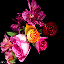

In [41]:
img

**CONVERTING IMAGE INTO MATRIX** 

In [42]:
x=image.img_to_array(img)

In [43]:
x

array([[[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       ...,

       [[  2.,   1.,   6.],
        [ 83.,  83.,  81.],
        [ 92.,  92.,  92.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[ 39.,  39.,  41.],
        [ 82.,  82.,  84.],
        [196., 196., 196.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[ 10.,   9.,  15.],
        [  4.,   4.,   4.],
        [  4.,  

In [44]:
x=np.expand_dims(x,axis=0)

In [45]:
x

array([[[[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        ...,

        [[  2.,   1.,   6.],
         [ 83.,  83.,  81.],
         [ 92.,  92.,  92.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[ 39.,  39.,  41.],
         [ 82.,  82.,  84.],
         [196., 196., 196.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[ 10.,   9.,  15.],
       

In [48]:
pred=model.predict(x)

1/1 [==============================] - 0s 18ms/step


In [49]:
pred

array([[1., 0., 0., 0., 0.]], dtype=float32)

In [50]:
index=['daisy','dandelion','rose','sunflower','tulip']

In [51]:
index[np.argmax(pred)]

'daisy'